In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 로드 및 전처리 과정
X_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\X_data.csv')  
# X 데이터 로드
y_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\y_data.csv')  
# y 데이터 로드

scaler = MinMaxScaler()  # MinMaxScaler를 사용해 0과 1 사이로 정규화
X_scaled = scaler.fit_transform(X_data)

time_steps = 5  # LSTM에서 사용할 타임스텝 설정
X_lstm, y_lstm = [], []
for i in range(len(X_scaled) - time_steps):
    X_lstm.append(X_scaled[i:i + time_steps, :])
    y_lstm.append(y_data.iloc[i + time_steps].values)

X_lstm = np.array(X_lstm)  # 리스트를 NumPy 배열로 변환
y_lstm = np.array(y_lstm)

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, shuffle=False)
# train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# 10월 11일 바꿔서 돌려 볼것 실패시 lstm은 포기하고 넘어간다
# train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, shuffle=False)

In [3]:
# 개선된 LSTM 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input 레이어로 입력 형상 지정
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))  # 양방향 LSTM 계층
model.add(Dropout(0.3))  # 과적합 방지를 위한 Dropout 계층 추가
model.add(LSTM(units=50))  # 두 번째 LSTM 계층 (마지막 시퀀스 반환)
model.add(Dense(2))  # 출력층 (출력값의 차원이 2이므로 2개의 뉴런)

In [4]:
# 모델 컴파일 (손실 함수: 평균 제곱 오차, 옵티마이저: Adam, 학습률 조정)
model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
# 조기 종료 콜백 설정 (검증 손실이 더 이상 감소하지 않으면 학습을 멈춤)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [6]:
# 모델 학습 (훈련 데이터와 검증 데이터를 사용하여 모델 학습)
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 10351737.0000 - val_loss: 39216276.0000
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10398418.0000 - val_loss: 39102244.0000
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10322850.0000 - val_loss: 38990128.0000
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10140556.0000 - val_loss: 38879168.0000
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10262154.0000 - val_loss: 38769224.0000
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10279572.0000 - val_loss: 38659560.0000
Epoch 7/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9879313.0000 - val_loss: 38550400.0000
Epoch 8/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9905234.0000 - val_loss: 38441576.0000
Epoch 9/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9882243.0000 - val_loss: 38333192.0000
Epoch 10/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9932040.0000 - val_loss: 3822510

KeyboardInterrupt: 

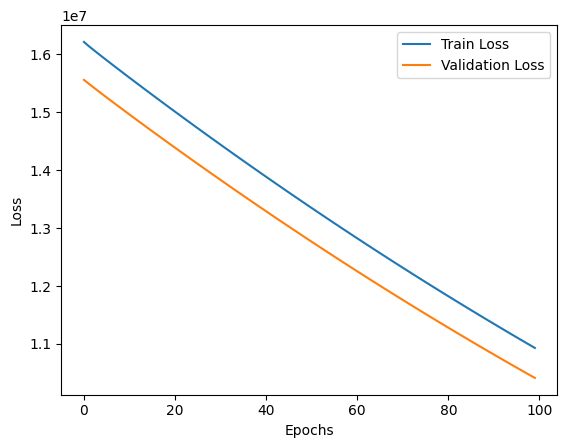

In [9]:
# 학습 손실 시각화 (훈련 손실과 검증 손실을 그래프로 표시)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Squared Error: 10412430.966426164


추가적으로 그냥 궁금해서 진행하는과정
- 에포크를 최대로 설정해서 돌려본다


Epoch 1/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9470986.0000 - val_loss: 37638744.0000
Epoch 2/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9686478.0000 - val_loss: 37532148.0000
Epoch 3/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9487180.0000 - val_loss: 37425804.0000
Epoch 4/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9462469.0000 - val_loss: 37319652.0000
Epoch 5/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9268275.0000 - val_loss: 37213404.0000
Epoch 6/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9545974.0000 - val_loss: 37107628.0000
Epoch 7/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9237915.0000 - val_loss: 37001904.0000
Epoch 8/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9148917.0000 - val_loss: 36896456.0000
Epoch 9/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9249427.0000 - val_loss: 36790856.0000
Epoch 10/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9317163.0000 - val_loss: 366

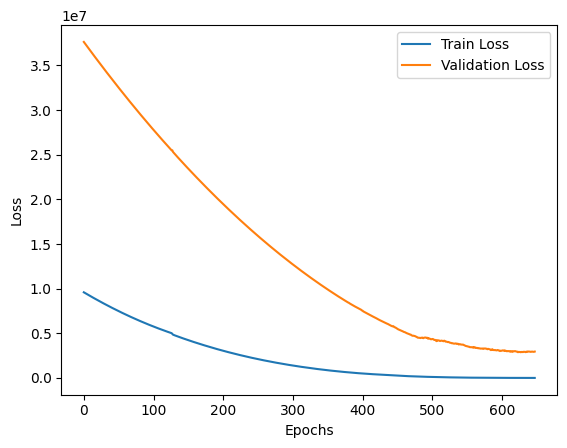

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Squared Error: 2876474.899304101


In [7]:
# 조기 종료 콜백 설정 (검증 손실이 더 이상 감소하지 않으면 학습을 멈춤)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습 (훈련 데이터와 검증 데이터를 사용하여 모델 학습)
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 학습 손실 시각화 (훈련 손실과 검증 손실을 그래프로 표시)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


In [8]:
from sklearn.metrics import r2_score

In [9]:
# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # R² 값 계산
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')  # R² 값 출력


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 2876474.899304101
Root Mean Squared Error: 1696.0173640927444
R² Score: -8.373340606689453


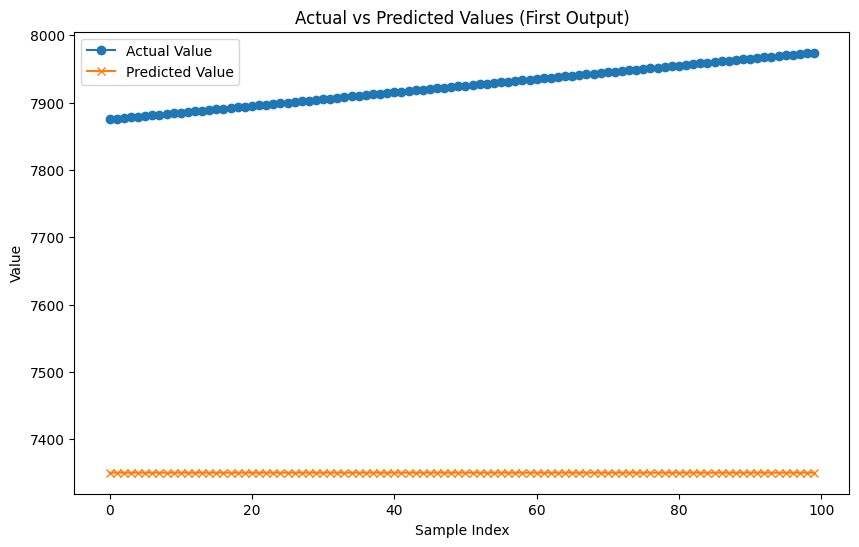

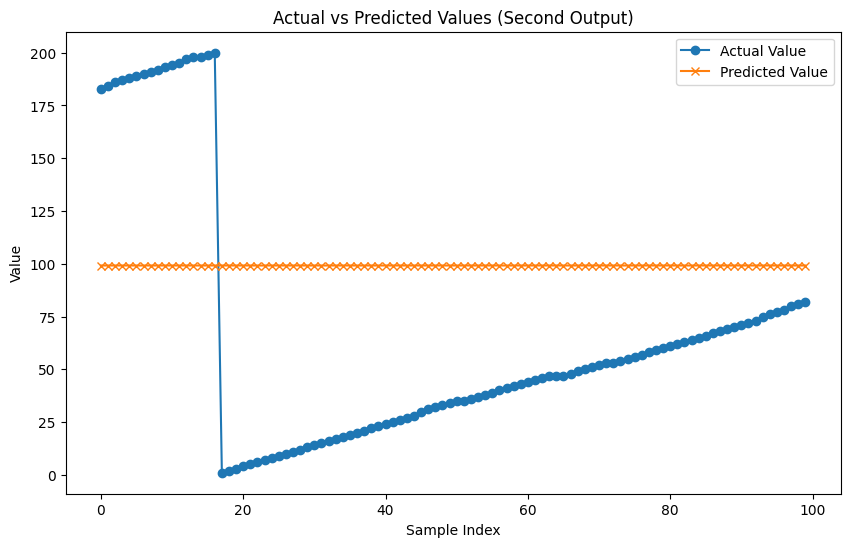

In [10]:
# 모델 예측값과 실제값 비교 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100, 0], label='Actual Value', marker='o')  # 실제값 (첫 번째 열만 표시)
plt.plot(predictions[:100, 0], label='Predicted Value', marker='x')  # 예측값 (첫 번째 열만 표시)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (First Output)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100, 1], label='Actual Value', marker='o')  # 실제값 (두 번째 열만 표시)
plt.plot(predictions[:100, 1], label='Predicted Value', marker='x')  # 예측값 (두 번째 열만 표시)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values (Second Output)')
plt.legend()
plt.show()